In [2]:
# Choose the basic libraries for the project
from IPython.display import Image, display
import kaggle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly_express as px
import seaborn as sns
import zipfile

## EDA

In [3]:
# Get the dataset from Kaggle in zip format
#!kaggle datasets download -d mohammadtalib786/retail-sales-dataset

In [4]:
# Extract the zip
z_file = 'retail-sales-dataset.zip'
with zipfile.ZipFile(z_file, 'r') as file:
    file.extractall()

In [5]:
# Read the extracted file with pandas and check its form
df = pd.read_csv('retail_sales_dataset.csv')
df.shape

(1000, 9)

In [6]:
# View the column names
list(df.columns.values)

['Transaction ID',
 'Date',
 'Customer ID',
 'Gender',
 'Age',
 'Product Category',
 'Quantity',
 'Price per Unit',
 'Total Amount']

In [7]:
# Delete blankspaces before and after column names
df.columns.str.strip()

# Change column names into lowercase and replace space for _ within words
new_cols = {col: col.lower().replace(' ', '_') for col in df.columns}
df.rename(columns=new_cols, inplace=True)
df.columns

Index(['transaction_id', 'date', 'customer_id', 'gender', 'age',
       'product_category', 'quantity', 'price_per_unit', 'total_amount'],
      dtype='object')

In [8]:
# Check if there is null values
df.isnull().sum()

transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

In [9]:
# Dete duplicated values
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_id    1000 non-null   int64 
 1   date              1000 non-null   object
 2   customer_id       1000 non-null   object
 3   gender            1000 non-null   object
 4   age               1000 non-null   int64 
 5   product_category  1000 non-null   object
 6   quantity          1000 non-null   int64 
 7   price_per_unit    1000 non-null   int64 
 8   total_amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [10]:
# Change the type of date column from object to datetime
df['date'] = pd.to_datetime(df['date'])

In [11]:
# Create a new column with monthly period
df['year_month'] = df['date'].dt.to_period('M')
df['year_month'] = df['year_month'].dt.strftime('%Y-%m')

In [12]:
# View the top 5 rows of the dataframe
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year_month
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05


## Visualization

In [13]:
# Check the descriptive statistics
df.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [14]:
# Calculate data's mean and standard deviation
mean_val = df['total_amount'].mean()
std_dev = df['total_amount'].std()

# Crete the Gaussian Distribution
x_values = np.linspace(df['total_amount'].min(), df['total_amount'].max(), 100)
y_values = (1/(std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_values - mean_val) / std_dev) ** 2)

# Create histogram plot
fig = px.histogram(df, x='total_amount', histnorm='probability density')
fig.add_scatter(x=x_values, y=y_values, mode='lines', name='Distribución Gaussiana')

# Show histogram
fig.show()

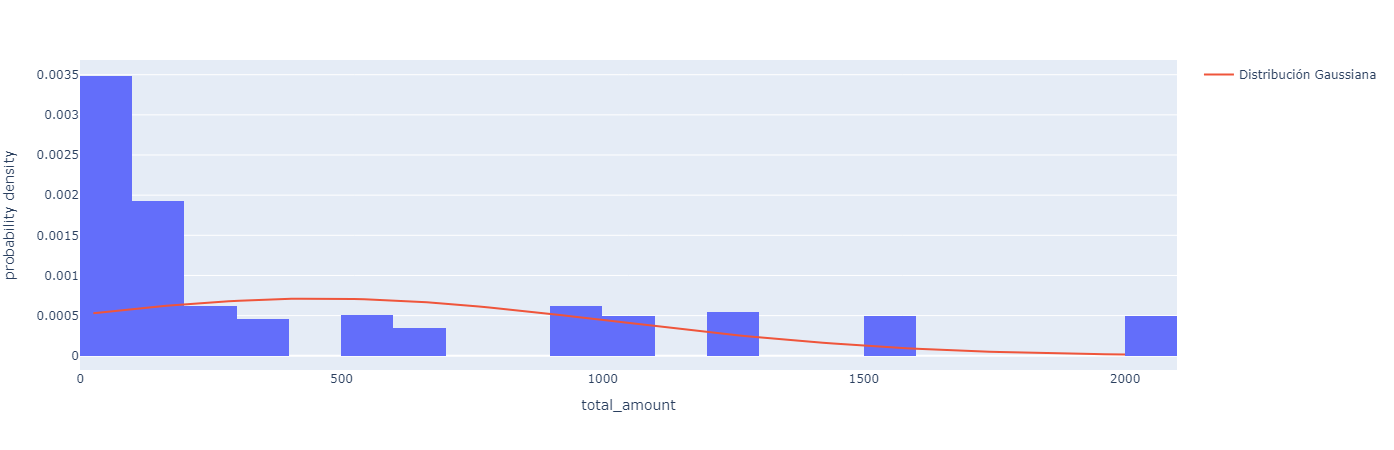

In [56]:
display(Image(filename='sales_histogram.png'))

In [15]:
# Calculate total daily sales
total_sales = df.groupby('date')['total_amount'].sum().reset_index()
print(total_sales)

          date  total_amount
0   2023-01-01          3600
1   2023-01-02          1765
2   2023-01-03           600
3   2023-01-04          1240
4   2023-01-05          1100
..         ...           ...
340 2023-12-27           700
341 2023-12-28          2075
342 2023-12-29          3400
343 2023-12-31            50
344 2024-01-01          1530

[345 rows x 2 columns]


In [16]:
# Plotting the time series of daily sales
fig = px.line(total_sales, x='date', y='total_amount')
fig.update_layout(title='Sales Evolution')
fig.show()

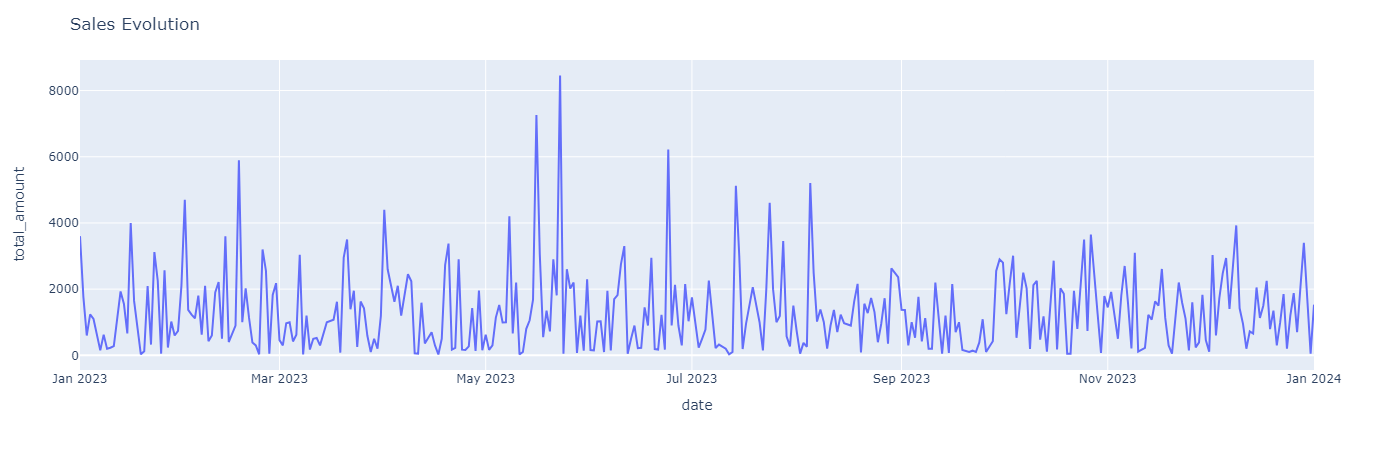

In [55]:
display(Image(filename='sales_lineplot.png'))

In [17]:
# Calculate monthly total sales
filtered_date = df[df['date'].dt.year < 2024]
gral_monthly_sales = filtered_date.resample('M', on='date').agg({'total_amount': 'sum'}).reset_index()
print(gral_monthly_sales)

         date  total_amount
0  2023-01-31         35450
1  2023-02-28         44060
2  2023-03-31         28990
3  2023-04-30         33870
4  2023-05-31         53150
5  2023-06-30         36715
6  2023-07-31         35465
7  2023-08-31         36960
8  2023-09-30         23620
9  2023-10-31         46580
10 2023-11-30         34920
11 2023-12-31         44690


In [18]:
# Plotting time series of the monthly total sales
fig = px.line(gral_monthly_sales, x='date', y='total_amount')
fig.update_layout(title='Monthly Sales Evolution')
fig.show()

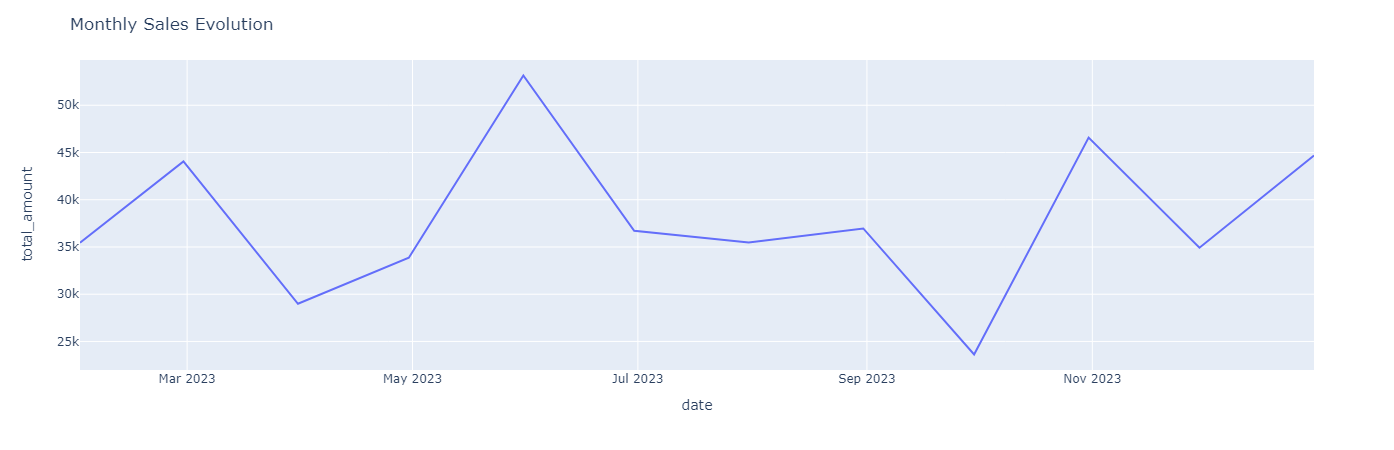

In [54]:
display(Image(filename='monthly_sales.png'))

In [19]:
# Bar plot of product category frequencies
fig = px.histogram(df, x='product_category', color='product_category')
fig.update_layout(title='Distribution of Product Categories')
fig.show()

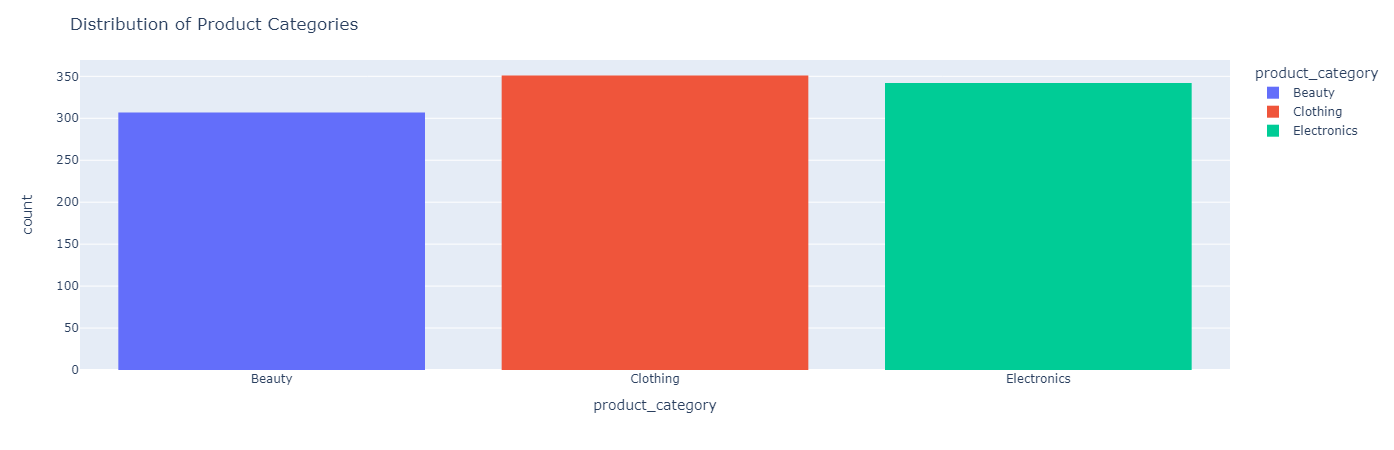

In [53]:
display(Image(filename='dist_cat.png'))

In [20]:
# Calculate average sales by product category
cat_avg_sales = df.groupby('product_category')['total_amount'].mean()
print(cat_avg_sales)

product_category
Beauty         467.475570
Clothing       443.247863
Electronics    458.786550
Name: total_amount, dtype: float64


In [21]:
# Calculate total sales by product category
cat_tot_sales = df.groupby('product_category')['total_amount'].sum().reset_index()
print(cat_tot_sales)

  product_category  total_amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


In [22]:
# Plotting total sales by category
fig = px.bar(cat_tot_sales, x='product_category', y='total_amount', color='product_category')
fig.update_layout(title='Sales by Product Category')
fig.show()

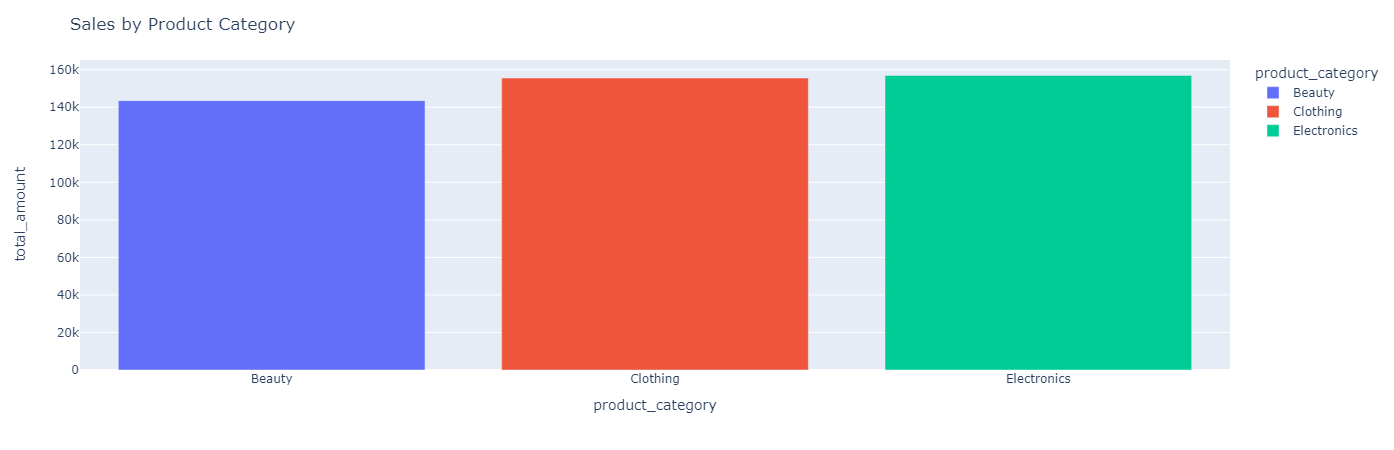

In [52]:
display(Image(filename='sales_cat.png'))

In [23]:
# Calculate total monthly sales by product category
cat_monthly_sales = filtered_date.groupby(['year_month', 'product_category'])['total_amount'].sum().reset_index()
print(cat_monthly_sales)

   year_month product_category  total_amount
0     2023-01           Beauty         12430
1     2023-01         Clothing         13125
2     2023-01      Electronics          9895
3     2023-02           Beauty         14035
4     2023-02         Clothing         14560
5     2023-02      Electronics         15465
6     2023-03           Beauty         10545
7     2023-03         Clothing         15065
8     2023-03      Electronics          3380
9     2023-04           Beauty         11905
10    2023-04         Clothing         13940
11    2023-04      Electronics          8025
12    2023-05           Beauty         12450
13    2023-05         Clothing         17455
14    2023-05      Electronics         23245
15    2023-06           Beauty         10995
16    2023-06         Clothing         10170
17    2023-06      Electronics         15550
18    2023-07           Beauty         16090
19    2023-07         Clothing          8250
20    2023-07      Electronics         11125
21    2023

In [24]:
# Plotting the time series of monthly category sales
fig = px.line(cat_monthly_sales, x='year_month', y='total_amount', color='product_category')
fig.update_layout(title='Category Monthly Sales Evolution')
fig.show()

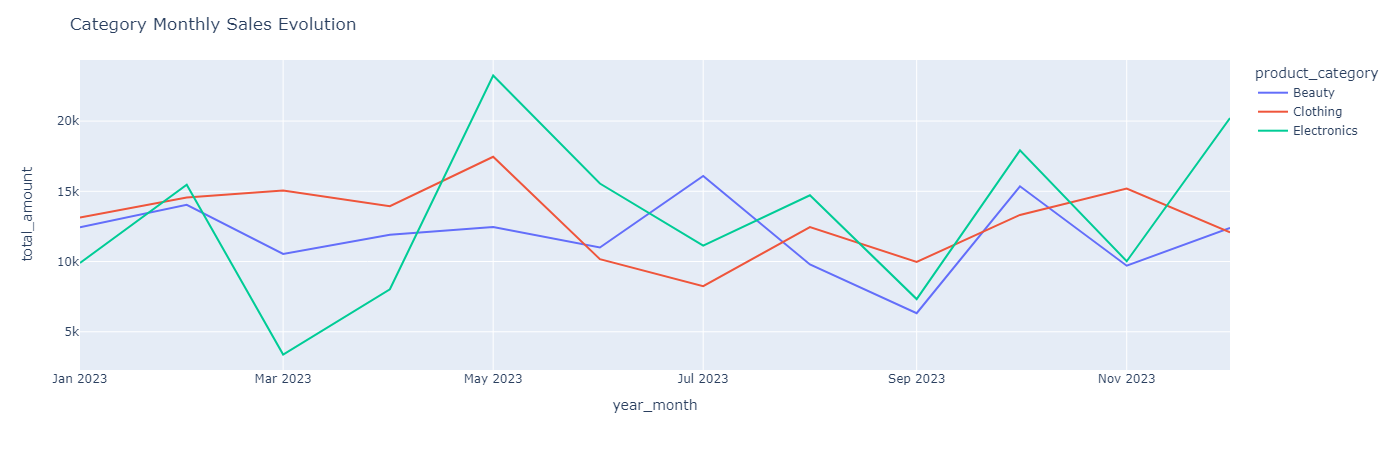

In [51]:
display(Image(filename='monthly_cat.png'))

In [25]:
# Stacked bar chart of the PPU's frequencies by category
fig = px.histogram(df, x='price_per_unit', color='product_category', nbins=5)
fig.update_layout(title='Distribution of Price Per Unit (PPU) by Product Categories')
fig.show()

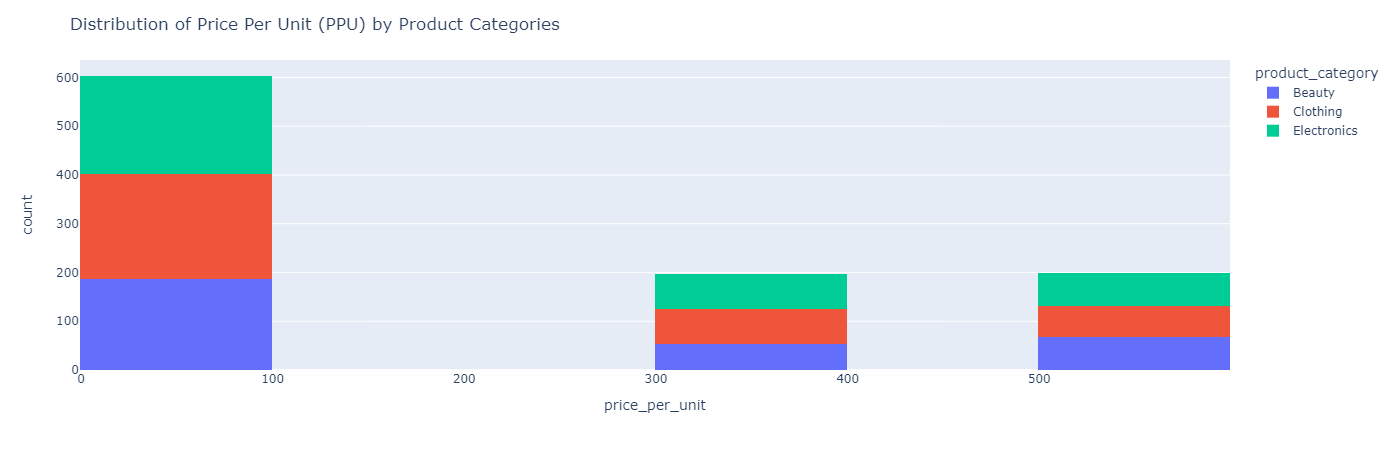

In [50]:
display(Image(filename='ppu_cat_dist.png'))

In [26]:
# Correlation Matrix
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                transaction_id       age  quantity  price_per_unit  \
transaction_id        1.000000  0.065191 -0.026623       -0.060837   
age                   0.065191  1.000000 -0.023737       -0.038423   
quantity             -0.026623 -0.023737  1.000000        0.017501   
price_per_unit       -0.060837 -0.038423  0.017501        1.000000   
total_amount         -0.075034 -0.060568  0.373707        0.851925   

                total_amount  
transaction_id     -0.075034  
age                -0.060568  
quantity            0.373707  
price_per_unit      0.851925  
total_amount        1.000000  


In [27]:
# Plotting the correlation heat map
fig = px.imshow(corr_matrix,
                labels={'Color':'Correlation'},
                x=corr_matrix.columns,
                y=corr_matrix.index,
                color_continuous_scale='Blues',
                title='Correlation Heatmap')
fig.update_layout(xaxis_title='Variables', yaxis_title='Variables')
fig.show()

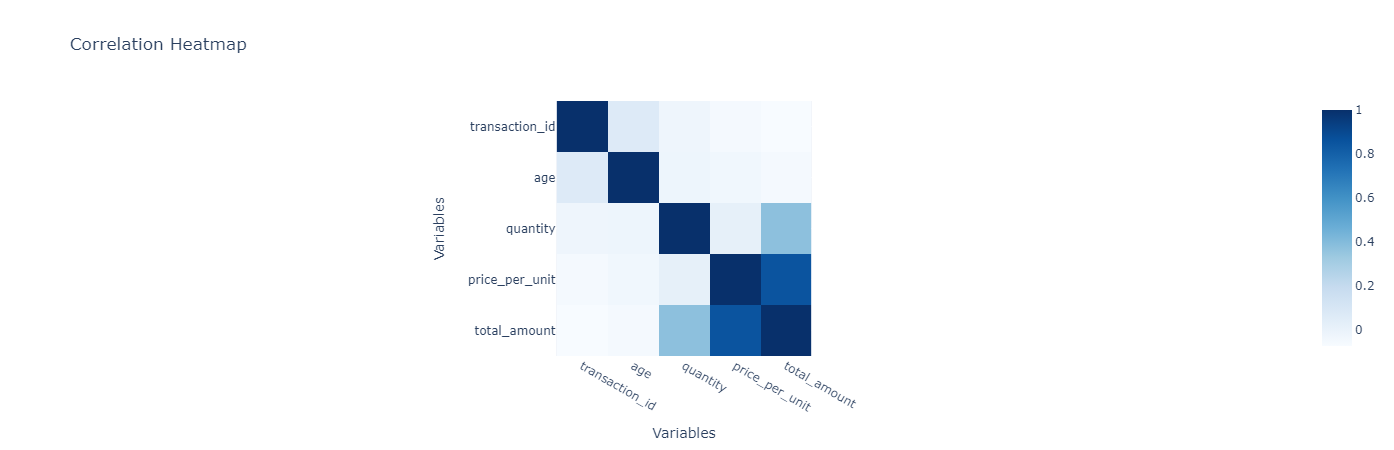

In [49]:
display(Image(filename='heatmap.png'))

In [28]:
# Pair plot of the high correlated variables
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Choose the variables (columns)
columns = ['price_per_unit', 'quantity', 'total_amount']

# Create a figure with subplots
fig = make_subplots(
    rows=len(columns), cols=len(columns),
    subplot_titles=[f'{x} vs {y}' for x in columns for y in columns],
    horizontal_spacing=0.05, vertical_spacing=0.05
)

# Add scatter plots to each subplot
for i, x in enumerate(columns):
    for j, y in enumerate(columns):
        if i == j:
            # Histograma en la diagonal
            hist = go.Histogram(x=df[x], name=x)
            fig.add_trace(hist, row=i+1, col=j+1)
        else:
            # Gráfico de dispersión fuera de la diagonal
            scatter = go.Scatter(x=df[x], y=df[y], mode='markers', name=f'{x} vs {y}')
            fig.add_trace(scatter, row=i+1, col=j+1)

# Update figure's design
fig.update_layout(title='Pair Plot', showlegend=False, height=800, width=800)
fig.show()

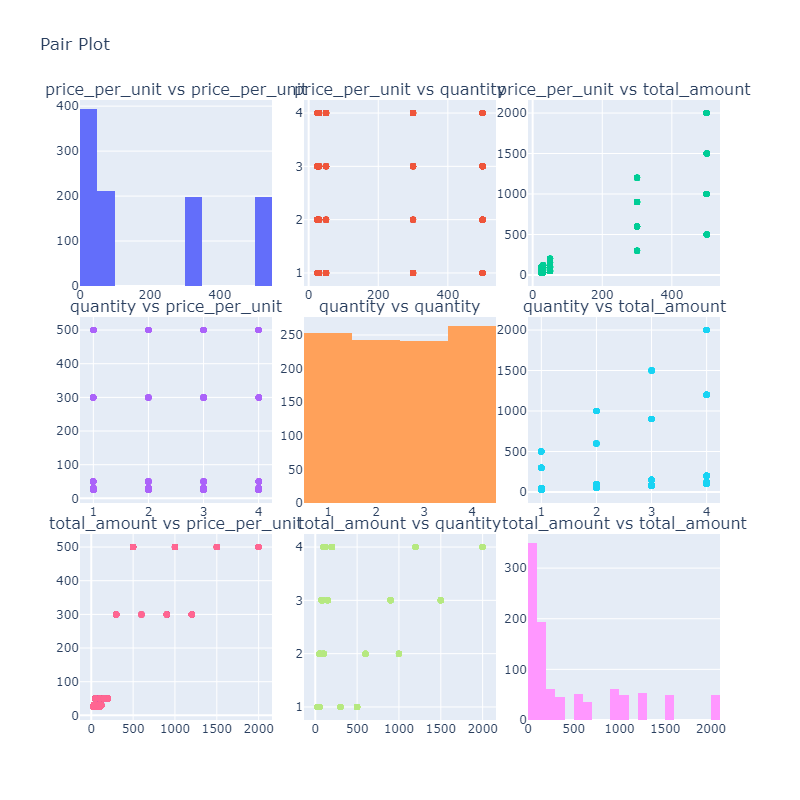

In [48]:
display(Image(filename='pairplot.png'))

In [29]:
df_sample = df.head(100)  # Muestra solo las primeras 100 filas
fig = px.scatter(df_sample, x='price_per_unit', y='total_amount', title='Scatterplot of Price per Unit vs Total Amount')
fig.show()

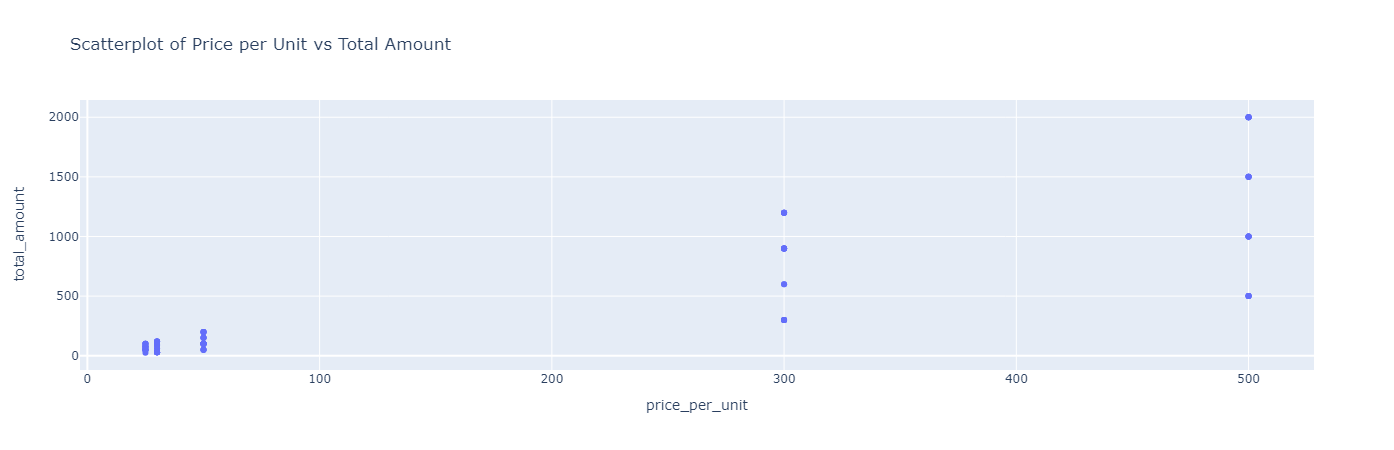

In [47]:
display(Image(filename='scatter.png'))

## Check Causality between variables

In [32]:
# Check relation between PPU and Total Amount with linear regression
import statsmodels.api as sm 

X = df['price_per_unit']
Y = df['total_amount']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           total_amount   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     2641.
Date:                Mon, 05 Aug 2024   Prob (F-statistic):          1.22e-282
Time:                        18:19:54   Log-Likelihood:                -7099.5
No. Observations:                1000   AIC:                         1.420e+04
Df Residuals:                     998   BIC:                         1.421e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.5508     12.790      0.

In [33]:
# Adjusting the linear reression
from sklearn.model_selection import train_test_split

# Split data in train and test
X = df[['price_per_unit']]
Y = df['total_amount']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Adjust the model in train data
X_train = sm.add_constant(X_train)
model = sm.OLS(Y_train, X_train).fit()

# Make predictions in test data
X_test = sm.add_constant(X_test)
Y_pred = model.predict(X_test)

# Evaluate the model in test data
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 78934.38442522456
R-squared: 0.7303501400070516


### Interpretation
The model is significant as a whole and explains a large portion of the variability in total_amount. The price_per_unit is a significant variable and has a positive impact on total_amount. However, tests for normality indicate that the residuals are not normally distributed, which could affect the validity of the model inferences. Therefore, the price_per_unit variable will be excluded for the quarterly forecast of total_amount.

In [34]:
# Calculate ANOVA to study differencies between product pategory and total amount
from statsmodels.formula.api import ols

# Convert product_category to categorical
df['product_category'] = df['product_category'].astype('category')

# Realize ANOVA
model = ols('total_amount ~ C(product_category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                           sum_sq     df         F    PR(>F)
C(product_category)  1.001626e+05    2.0  0.159431  0.852651
Residual             3.131836e+08  997.0       NaN       NaN


In [35]:
# Check asociation between both variables
import scipy.stats as stats

# Discretize total_amount in groups
df['total_amount_group'] = pd.qcut(df['total_amount'], q=4)  # Divide en 4 grupos

# Contingency table
contingency_table = pd.crosstab(df['product_category'], df['total_amount_group'])

# Chi-suared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}")
print(f"P-value: {p}")


Chi-squared: 6.139745521543861
P-value: 0.4077193066138794


In [36]:
# Preparing variables for Granger's causality test
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame to avoid modifications in the original
df_encoded = df.copy()

# Code the product_category column using LabelEncoder
label_encoder = LabelEncoder()
df_encoded['product_category'] = label_encoder.fit_transform(df_encoded['product_category'])

# Verify codification
print(df_encoded[['product_category', 'total_amount']].head())


   product_category  total_amount
0                 0           150
1                 1          1000
2                 2            30
3                 1           500
4                 0           100


In [37]:
# Causality test
from statsmodels.tsa.stattools import grangercausalitytests

# Define the max number of lags
max_lag = 4

# Realize the test
granger_result = grangercausalitytests(df_encoded[['total_amount', 'product_category']], max_lag)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=6.4460  , p=0.0113  , df_denom=996, df_num=1
ssr based chi2 test:   chi2=6.4654  , p=0.0110  , df=1
likelihood ratio test: chi2=6.4445  , p=0.0111  , df=1
parameter F test:         F=6.4460  , p=0.0113  , df_denom=996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.9131  , p=0.0075  , df_denom=993, df_num=2
ssr based chi2 test:   chi2=9.8756  , p=0.0072  , df=2
likelihood ratio test: chi2=9.8270  , p=0.0073  , df=2
parameter F test:         F=4.9131  , p=0.0075  , df_denom=993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.3153  , p=0.0194  , df_denom=990, df_num=3
ssr based chi2 test:   chi2=10.0162 , p=0.0184  , df=3
likelihood ratio test: chi2=9.9662  , p=0.0189  , df=3
parameter F test:         F=3.3153  , p=0.0194  , df_denom=990, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7387  , p=0.0276  

### Interpretation
For each number of lags tested (1, 2, 3, and 4), the results indicate that product_category can significantly predict total_amount. This suggests a causal relationship where the product category impacts the total amount, which can be useful for understanding and predicting sales patterns and enhancing logistics management. So the forecast will be about the quarterly total_amount by product_category.

## FORECAST

In [38]:
# Checkt last date entries with their values
print(df[df['date'].dt.year == 2024])

     transaction_id       date customer_id gender  age product_category  \
210             211 2024-01-01     CUST211   Male   42           Beauty   
649             650 2024-01-01     CUST650   Male   55      Electronics   

     quantity  price_per_unit  total_amount year_month total_amount_group  
210         3             500          1500    2024-01    (900.0, 2000.0]  
649         1              30            30    2024-01     (24.999, 60.0]  


In [39]:
# Forecast of daily general sales with FB Prophet
from prophet import Prophet

# Selecting and renaming columns for Prophet
dfp = df[['date', 'total_amount']].rename(columns={'date':'ds', 'total_amount':'y'})

# Initializing and fitting the Prophet model
model = Prophet()
model.fit(dfp)

# Creating future dates for prediction
future_dates = model.make_future_dataframe(periods=90)

# Making predictions for future dates
forecast = model.predict(future_dates)

# Filtering forecast for dates after Januaty 2nd
forecast = forecast[forecast['ds'] >= '2024-01-02']

forecast = forecast.rename(columns={'ds':'date', 'yhat':'total_amount', 'yhat_lower':'total_amount_lower', 'yhat_upper':'total_amount_upper'})

print(forecast[['date', 'total_amount', 'total_amount_lower', 'total_amount_upper']])

18:19:55 - cmdstanpy - INFO - Chain [1] start processing
18:19:55 - cmdstanpy - INFO - Chain [1] done processing


          date  total_amount  total_amount_lower  total_amount_upper
345 2024-01-02    434.218073         -247.075415         1166.255971
346 2024-01-03    425.890077         -257.343775         1170.804923
347 2024-01-04    440.580172         -244.182197         1129.034386
348 2024-01-05    466.773792         -243.762158         1165.923618
349 2024-01-06    528.675398         -261.306168         1219.359996
..         ...           ...                 ...                 ...
430 2024-03-27    427.750867         -251.532134         1109.113394
431 2024-03-28    442.440961         -305.560050         1166.329418
432 2024-03-29    468.634582         -238.942321         1182.745035
433 2024-03-30    530.536188         -179.312633         1245.109298
434 2024-03-31    429.852271         -344.001209         1119.186868

[90 rows x 4 columns]


In [40]:
# Forecast of daily category sales:
# Initialize an empty DataFrame to store all forecasts
all_fc = pd.DataFrame()

# Iterate over each unique product category in the dataset
for cat in df['product_category'].unique():
    
    # Select data for the current product category
    df_cat = df[df['product_category'] == cat]
    
    # Prepare data for Prophet by selecting and renaming columns
    dfp = df_cat[['date', 'total_amount']].rename(columns={'date':'ds', 'total_amount':'y'})

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(dfp)

    # Create future dates for prediction
    future_dates = model.make_future_dataframe(periods=90)

    # Make predictions for future dates
    forecast = model.predict(future_dates)
    forecast = forecast[forecast['ds'] >= '2024-01-02']
    forecast['product_category'] = cat

    # Combine the forecast for the current category to the overall forecast DataFrame
    all_fc = pd.concat([all_fc, forecast[['ds', 'yhat', 'product_category']].rename(columns={'ds':'date', 'yhat':'total_amount'})], ignore_index=True)
print(all_fc)

18:19:55 - cmdstanpy - INFO - Chain [1] start processing
18:19:56 - cmdstanpy - INFO - Chain [1] done processing
18:19:56 - cmdstanpy - INFO - Chain [1] start processing
18:19:56 - cmdstanpy - INFO - Chain [1] done processing
18:19:56 - cmdstanpy - INFO - Chain [1] start processing
18:19:56 - cmdstanpy - INFO - Chain [1] done processing


          date  total_amount product_category
0   2024-01-02    318.463303           Beauty
1   2024-01-03    319.925607           Beauty
2   2024-01-04    423.184393           Beauty
3   2024-01-05    533.894240           Beauty
4   2024-01-06    422.188990           Beauty
..         ...           ...              ...
261 2024-03-27    430.608077      Electronics
262 2024-03-28    408.235940      Electronics
263 2024-03-29    357.456354      Electronics
264 2024-03-30    564.372329      Electronics
265 2024-03-31    485.481743      Electronics

[266 rows x 3 columns]


In [41]:
# Plotting the catgory sales daily forecast
fig = px.line(all_fc, x='date', y='total_amount', color='product_category')
fig.show()

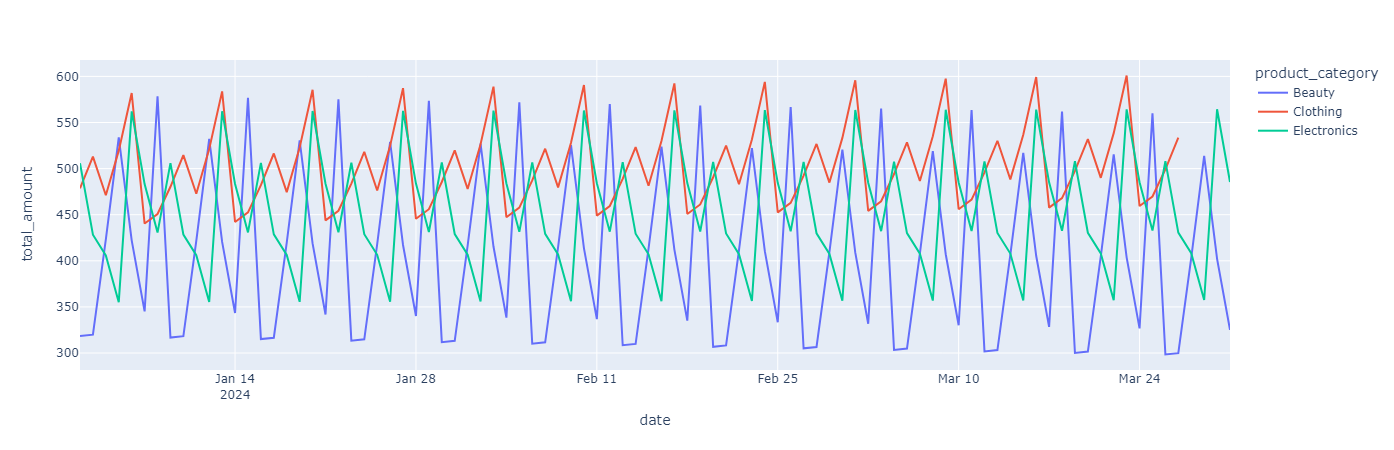

In [42]:
display(Image(filename='forecast_daily_gral.png'))

In [43]:
# Plotting monthly sales by category
all_fc['year_month'] = all_fc['date'].dt.to_period('M')
all_fc['year_month'] =all_fc['year_month'].dt.strftime('%Y-%m')

# Grouping data by month and product category
monthly_all_fc = all_fc.groupby(['year_month', 'product_category'])['total_amount'].sum().reset_index()

# Make the line plot
fig = px.line(monthly_all_fc, x='year_month', y='total_amount', color='product_category')
fig.show()

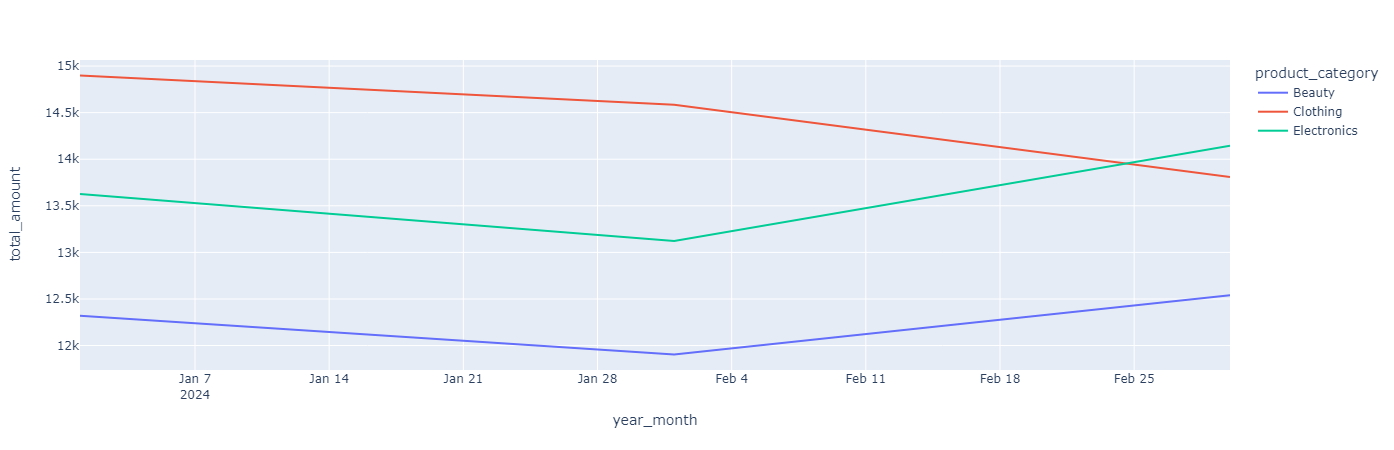

In [44]:
display(Image(filename='forecast_monthly_cat.png'))

In [45]:
# Tabulate the monthly sales by category forecast and combine with historical data
top_monthly_sales = gral_monthly_sales.head(3)

# Grouping data by month only
monthly_totals = all_fc.groupby('year_month')['total_amount'].sum().reset_index()
monthly_totals['total_amount'] = monthly_totals['total_amount'].astype(int)

# Rename total_amount column to avoid confussions
top_monthly_sales = top_monthly_sales.rename(columns={'total_amount': 'total_amount_real'})
monthly_totals = monthly_totals.rename(columns={'total_amount': 'total_amount_forecast'})

# Combine DataFrames based on 'year_month' column
comparison_df = pd.concat([top_monthly_sales, monthly_totals], axis=1)

print(comparison_df)

        date  total_amount_real year_month  total_amount_forecast
0 2023-01-31              35450    2024-01                  40846
1 2023-02-28              44060    2024-02                  39612
2 2023-03-31              28990    2024-03                  40495


In [46]:
# Add a column to calculate difference between reata data and forecast
comparison_df['difference'] = comparison_df['total_amount_forecast'] - comparison_df['total_amount_real']

# Add a column to calculate change percentage
comparison_df['percentage_change'] = (comparison_df['difference'] / comparison_df['total_amount_forecast']) * 100

print(comparison_df)

        date  total_amount_real year_month  total_amount_forecast  difference  \
0 2023-01-31              35450    2024-01                  40846        5396   
1 2023-02-28              44060    2024-02                  39612       -4448   
2 2023-03-31              28990    2024-03                  40495       11505   

   percentage_change  
0          13.210596  
1         -11.228921  
2          28.410915  


### Forecast Summary
The sales forecast for the three months in 2024 compared to the same months in 2023 shows significant variations:

1. Increase in January 2024: A 13.21% increase in sales is forecasted compared to January 2023. This suggests a positive trend in demand or improvements in sales strategies.
2. Decrease in February 2024: An 11.23% decrease in sales is forecasted compared to February 2023. This could indicate a decrease in demand or potential supply challenges during that month.
3. Significant Increase in March 2024: A 28.41% increase in sales is forecasted compared to March 2023, indicating a strong recovery or growth in demand.

### Considerations

- Seasonality and Trends: It is important to consider seasonal factors and long-term trends that may be influencing these forecasts.

- Ongoing Review: Since the forecasts are based on historical data, it is crucial to periodically review and update these forecasts with new data.

- Strategic Actions: Significant variations in the forecasted sales can guide strategic decision-making, such as adjustments in production, inventory, and marketing campaigns.

This analysis provides a clear view of sales expectations and allows for preparation for anticipated variations in demand.